In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
data['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [6]:
data_encoded = pd.get_dummies(data,columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

data_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,True,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,False,True,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False


In [7]:
data_encoded = data_encoded.replace({True:1, False:0})
data_encoded

C:\Users\dulin\AppData\Local\Temp\ipykernel_51912\222712792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({True:1, False:0})


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [8]:
scaler = StandardScaler()

numeric_columns = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])
data_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.309288,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,1.220553,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415,-0.746385,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,-0.090739,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


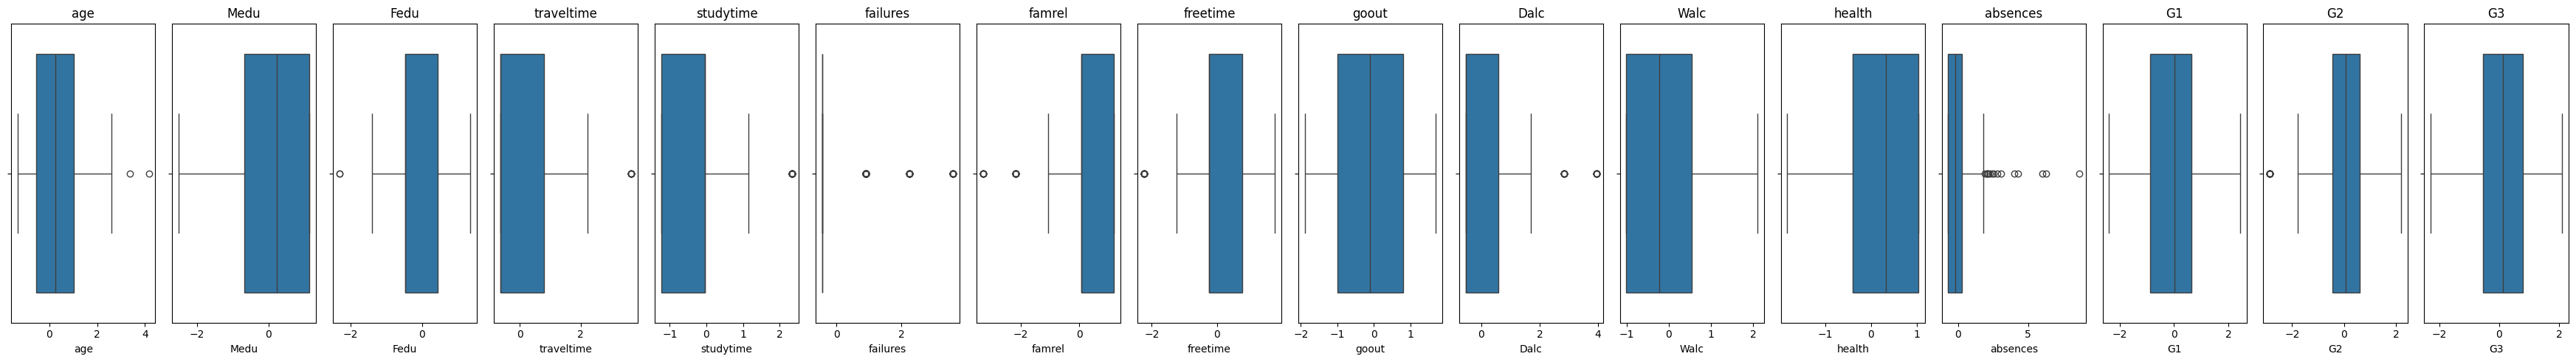

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(35, 5))

for i,column in enumerate(numeric_columns):
    sns.boxplot(x=data_encoded[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [10]:

Q1 = data_encoded[numeric_columns].quantile(0.25)
Q3 = data_encoded[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data_encoded[numeric_columns] < (Q1 - 1.5 * IQR)) | (data_encoded[numeric_columns] > (Q3 + 1.5 * IQR)))

outlier_rows = data_encoded[outliers.any(axis=1)]

print("Outlier rows:")
print(outlier_rows)


Outlier rows:
          age      Medu      Fedu  traveltime  studytime  failures    famrel  \
2   -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
7    0.238380  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
18   0.238380  0.229234 -0.479857   -0.643249  -1.235351  3.589323  1.178860   
19  -0.546287  1.143856  0.440257   -0.643249  -1.235351 -0.449944 -1.054472   
25  -0.546287 -0.685387 -0.479857   -0.643249  -1.235351  2.242901 -3.287804   
..        ...       ...       ...         ...        ...       ...       ...   
387  1.807713 -0.685387  0.440257   -0.643249   1.150779  0.896479  1.178860   
389  1.023046 -1.600009 -1.399970    0.792251  -0.042286  0.896479 -3.287804   
390  2.592380 -0.685387 -0.479857   -0.643249  -0.042286  2.242901  1.178860   
391  0.238380  0.229234 -1.399970    0.792251  -1.235351 -0.449944 -2.171138   
392  3.377047 -1.600009 -1.399970   -0.643249  -1.235351  3.589323  1.178860   

     freetime     goout  

In [11]:
data_cleaned = data_encoded[~outliers.any(axis=1)]

data_cleaned.reset_index(drop=True, inplace=True)

data_cleaned

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
4,-0.546287,1.143856,0.440257,-0.643249,-0.042286,-0.449944,1.178860,0.766399,-0.997295,-0.540699,-0.226345,1.041070,0.536865,1.234133,1.140903,1.002004,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.023046,-0.685387,-0.479857,0.792251,1.150779,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,0.551100,0.320890,-0.464016,-0.274167,-0.456226,-0.090739,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
228,1.023046,1.143856,1.360371,2.227751,-1.235351,-0.449944,0.062194,0.766399,-0.097908,0.583385,-0.226345,1.041070,0.161535,-1.480807,-1.520979,-0.964934,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
229,1.023046,0.229234,-1.399970,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-1.839649,-0.714236,-1.179147,-0.456226,-0.527837,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0
230,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,-0.090739,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [12]:
from sklearn.model_selection import train_test_split

x = data_cleaned.drop(columns=['G1','G2','G3'])
y = data_cleaned[['G1','G2','G3']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_pca,y_train)



LinearRegression()

In [47]:
y_pred_train = model.predict(x_train_pca)
y_pred_test = model.predict(x_test_pca)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}, R²: {train_r2}")
print(f"Testing MSE: {test_mse}, R²: {test_r2}")



Training MSE: 0.6191957304469223, R²: 0.12423248637786932
Testing MSE: 0.7947211392256227, R²: -0.051415074407061244


In [30]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: [0.19870549 0.24737382 0.26602675]
Coefficients: [[ 0.12415559 -0.04577335 -0.04276789 -0.00234022 -0.17179117  0.12816802
  -0.13496502  0.04702514 -0.00253972  0.01039221]
 [ 0.11511113 -0.10970847 -0.04342059 -0.06564847 -0.14025371  0.08855342
  -0.11286741  0.10620946 -0.01007359  0.08412256]
 [ 0.11226438 -0.0884678  -0.01360537 -0.07081988 -0.13581298  0.08099089
  -0.09156402  0.08796136 -0.03146955  0.05290129]]


In [18]:
data_cleaned.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

<Axes: >

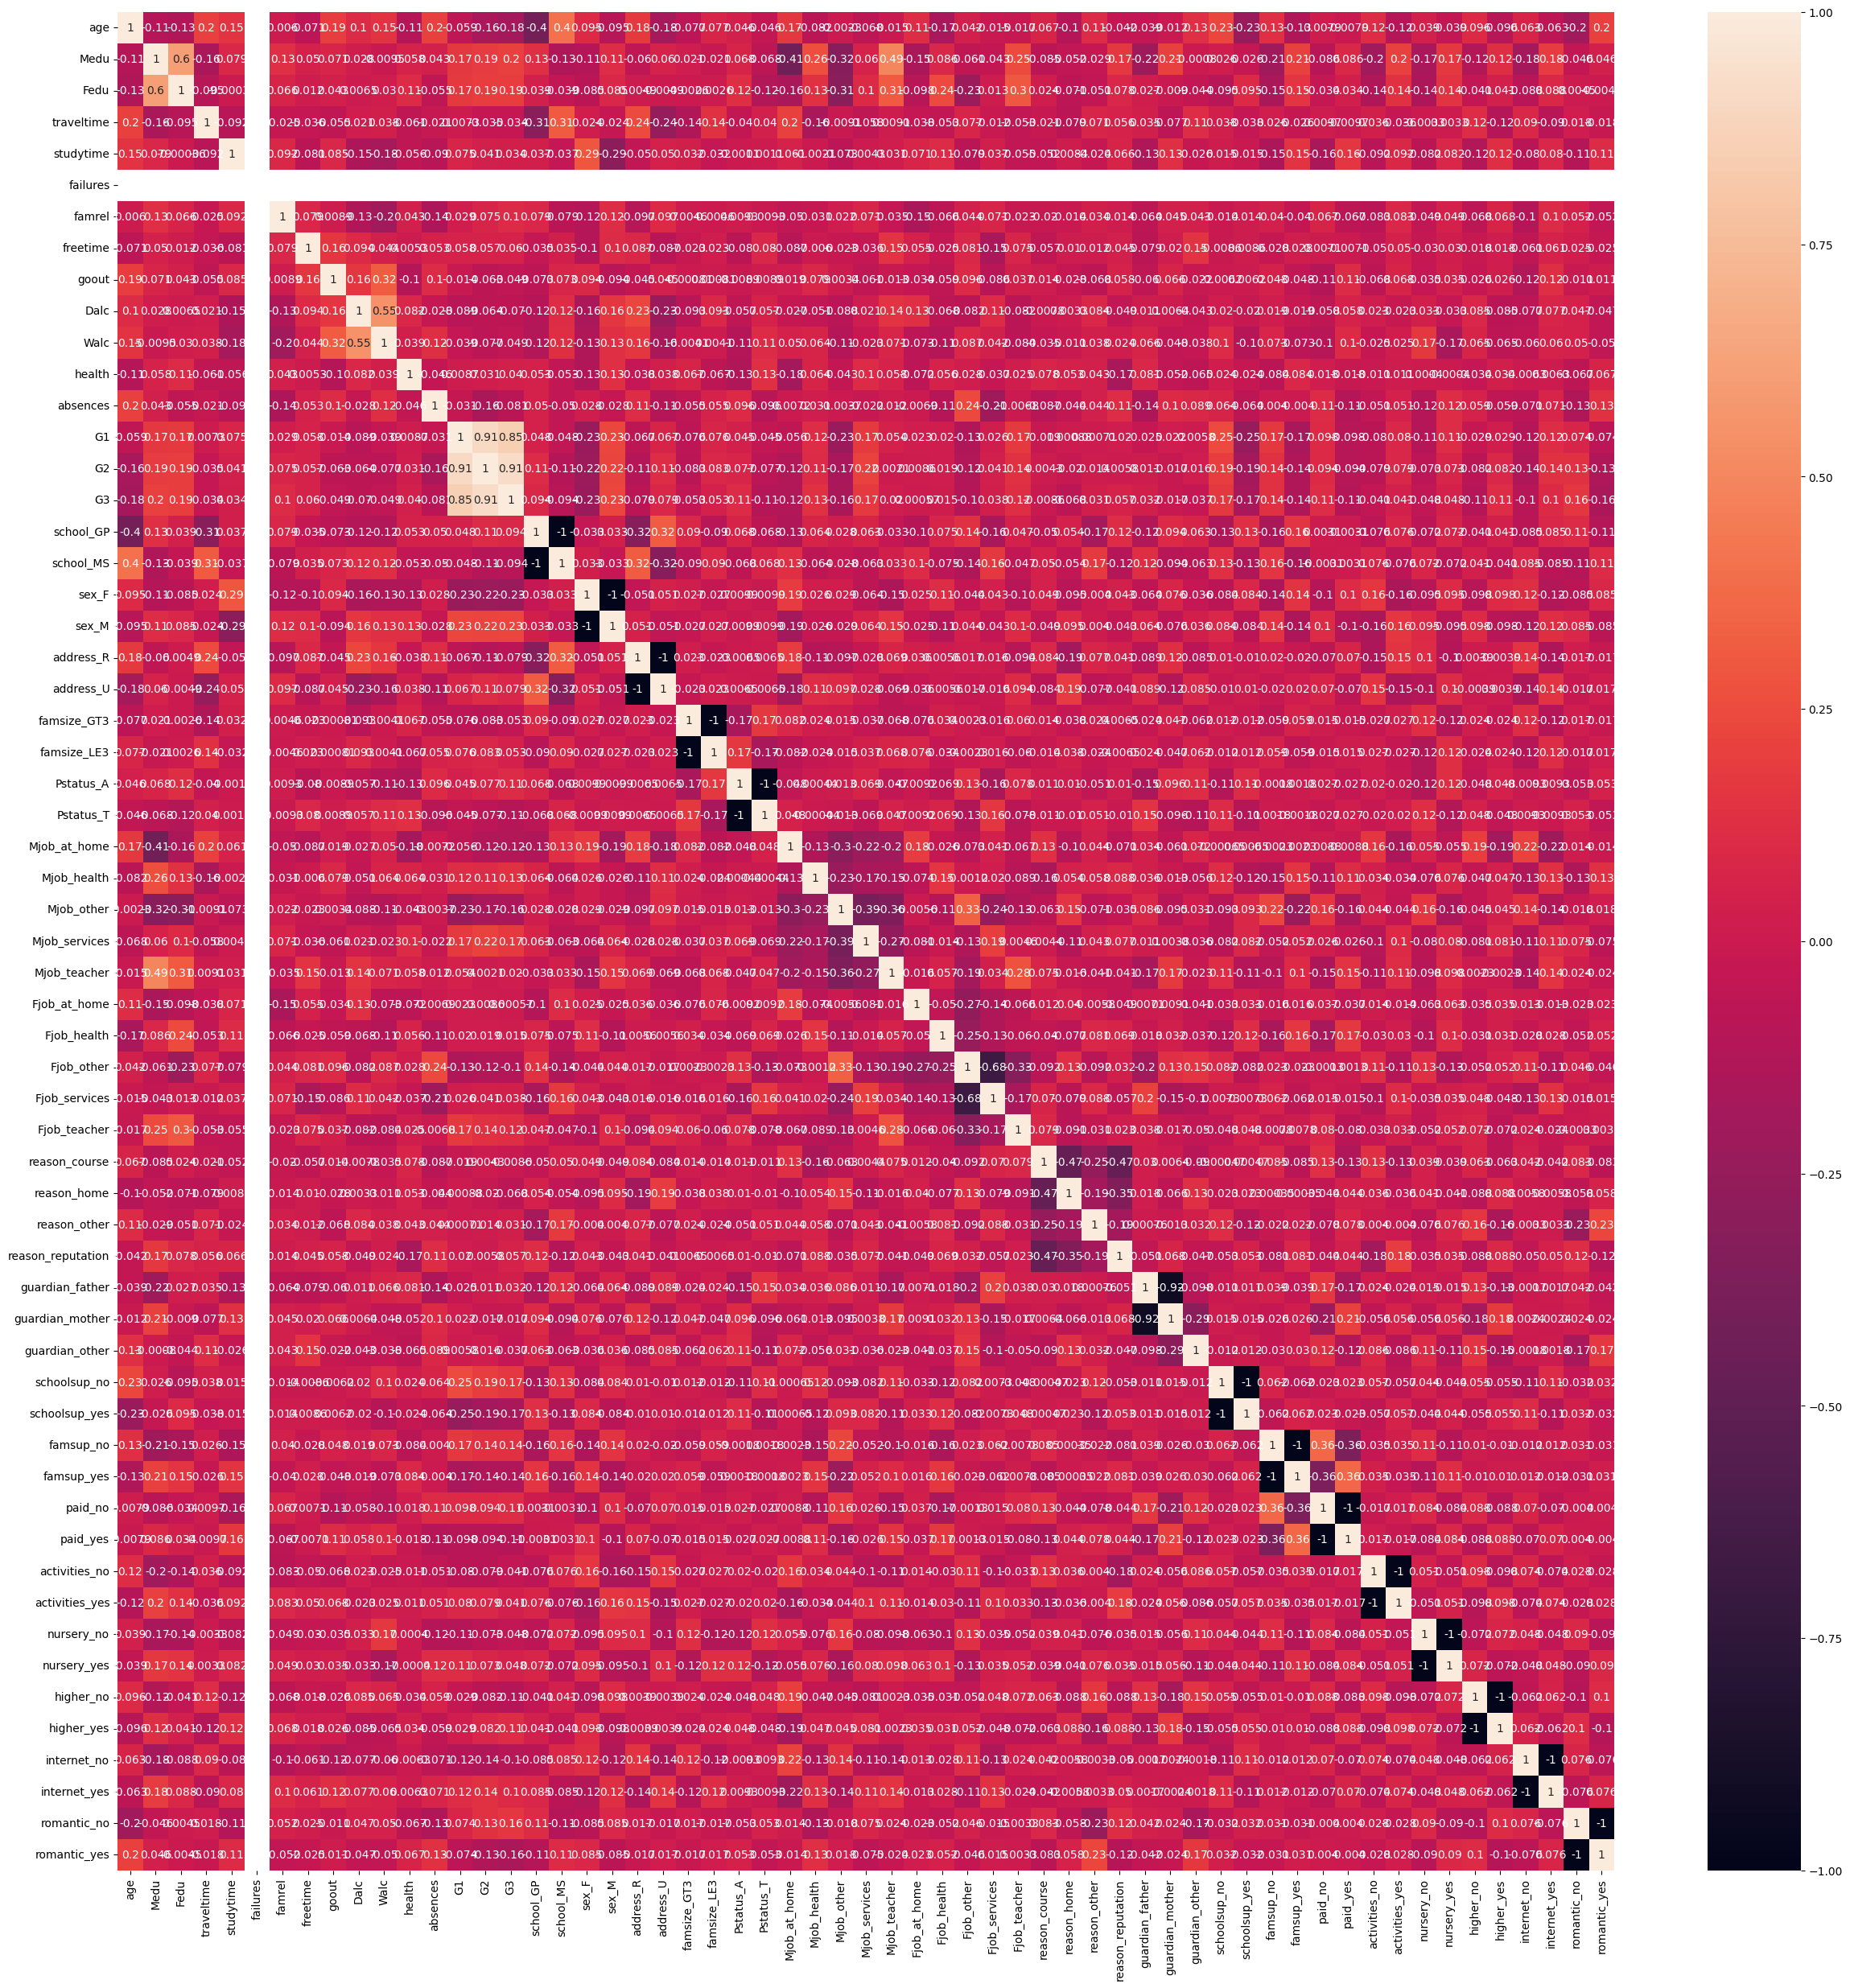

In [25]:
indipendent_var = data_cleaned[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

correlation = indipendent_var.corr()

plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)


Training MSE: 0.6191983096379325, R²: 0.1242287878897375
Testing MSE: 0.7940009093224796, R²: -0.050402170587681226
